In [6]:
%matplotlib inline

In [7]:
from pandas.io.data import get_data_yahoo
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#日経平均のヒストリカルデータをYahooからダウンロード
MUFG = get_data_yahoo(symbols='8306', start='4/1/2014')
FUKUI = get_data_yahoo(symbols='8362', start='4/1/2014')
NIKKEI = get_data_yahoo(symbols='^N225', start='4/1/2014')
#web.DataReader('***', 'yahoo', start='5/1/2016')と同じ

In [9]:
FUKUI.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-04-01,257,261,257,260,399000,245.595
2014-04-02,267,271,265,265,579000,250.318
2014-04-03,264,268,263,267,338000,252.207
2014-04-04,266,268,264,266,230000,251.263
2014-04-07,260,263,257,258,170000,243.706


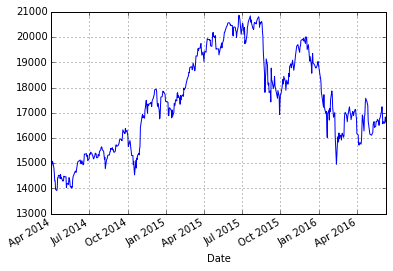

In [10]:
NIKKEI['Adj Close'].plot(grid=True)
plt.show()

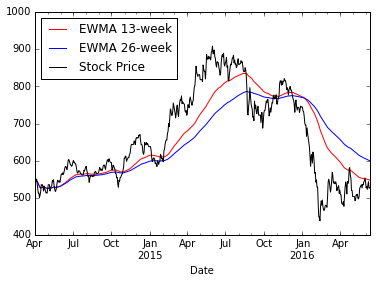

In [12]:
ewma91 = pd.stats.moments.ewma(MUFG['Adj Close'], span=91)
ewma182 = pd.stats.moments.ewma(MUFG['Adj Close'], span=182)
ewma91.plot(label="EWMA 13-week", color="red") # プロットする
ewma182.plot(label="EWMA 26-week", color="blue")
MUFG['Adj Close'].plot(label="Stock Price", color="black")

plt.legend(loc="best") # 各線のラベルを表示

日経平均とメガバンク

In [48]:
f = get_data_yahoo(symbols=['8306','^N225'], start='4/1/2016')

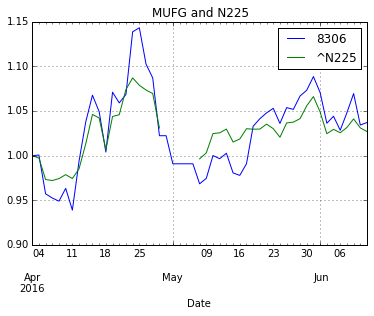

In [49]:
f['Adj Close']['8306'] /= f['Adj Close']['8306'][0]
f['Adj Close']['^N225'] /= f['Adj Close']['^N225'][0]
f['Adj Close'].plot(title='MUFG and N225', grid=True)
plt.show()

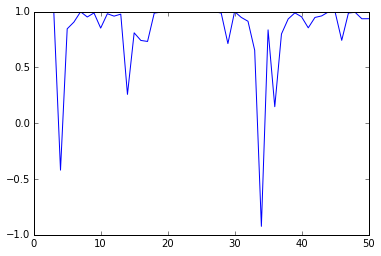

In [52]:
x = f['Adj Close']['8306']
y = f['Adj Close']['^N225']
roll_cor=pd.rolling_corr(x, y, window=3)

plt.plot(roll_cor)
plt.show()

日経平均と地方銀行

In [53]:
g = get_data_yahoo(symbols=['8362','^N225'], start='4/1/2016')

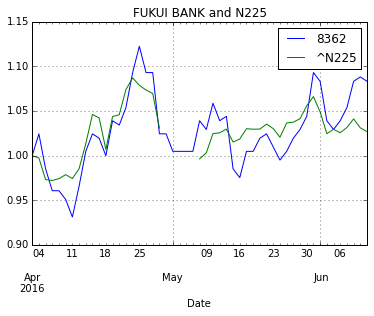

In [54]:
g['Adj Close']['8362'] /= g['Adj Close']['8362'][0]
g['Adj Close']['^N225'] /= g['Adj Close']['^N225'][0]
g['Adj Close'].plot(title='FUKUI BANK and N225', grid=True)
plt.show()

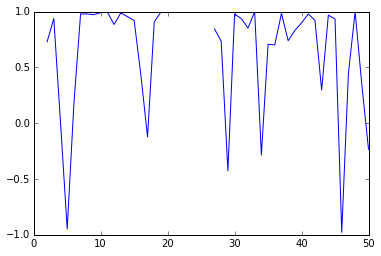

In [56]:
z = g['Adj Close']['8362']
roll_cor2=pd.rolling_corr(z, y, window=3)

plt.plot(roll_cor2)
plt.show()

In [57]:
f5 = pd.concat([roll_cor, roll_cor2], axis=1)

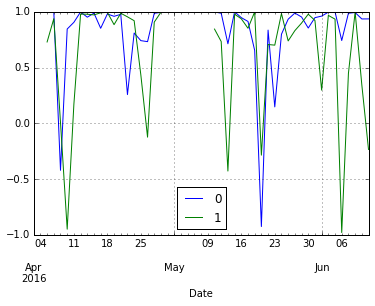

In [58]:
f5.plot(grid=True)
plt.show()

日経平均と輸出産業

In [59]:
h = get_data_yahoo(symbols=['6981','^N225'], start='4/1/2016')

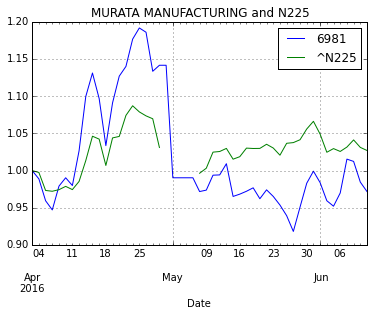

In [60]:
h['Adj Close']['6981'] /= h['Adj Close']['6981'][0]
h['Adj Close']['^N225'] /= h['Adj Close']['^N225'][0]
h['Adj Close'].plot(title='MURATA MANUFACTURING and N225', grid=True)
plt.show()

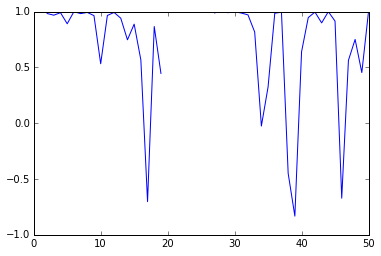

In [61]:
m = h['Adj Close']['6981']
roll_cor3=pd.rolling_corr(m, y, window=3)

plt.plot(roll_cor3)
plt.show()

In [62]:
f6 = pd.concat([roll_cor, roll_cor3], axis=1)

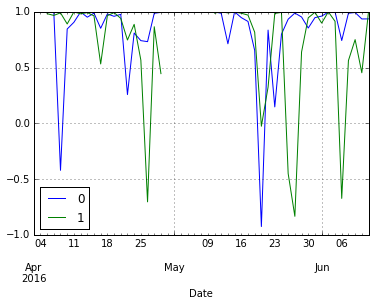

In [63]:
f6.plot(grid=True)